In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instagram-analytics-dataset/Instagram_Analytics.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/kaggle/input/instagram-analytics-dataset/Instagram_Analytics.csv")
df.head()

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology


# Exploratory Data Analysis

**Check null values**


In [3]:
df.isnull().sum()

post_id             0
upload_date         0
media_type          0
likes               0
comments            0
shares              0
saves               0
reach               0
impressions         0
caption_length      0
hashtags_count      0
followers_gained    0
traffic_source      0
engagement_rate     0
content_category    0
dtype: int64

In [4]:
df.describe()

,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,engagement_rate
count,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000
mean,99912.661789,5017.781426,2502.912564,7490.124637,9.965616e+05,1.246669e+06,1103.110904,14.887430,502.152805,14.419276
std,57905.967401,2888.404881,1448.320395,4352.546949,5.777906e+05,5.970924e+05,635.991308,9.005811,290.364038,29.660210
min,7.000000,0.000000,0.000000,0.000000,1.650000e+02,5.107000e+03,0.000000,0.000000,0.000000,0.120000
25%,49755.000000,2530.500000,1246.000000,3690.500000,4.936810e+05,7.469585e+05,555.000000,7.000000,251.000000,5.180000
50%,99580.000000,5042.000000,2498.000000,7483.000000,9.921810e+05,1.241026e+06,1100.000000,15.000000,501.000000,9.190000
75%,150225.000000,7518.000000,3768.000000,11294.000000,1.494798e+06,1.749264e+06,1656.000000,23.000000,755.000000,15.670000
max,200000.000000,10000.000000,5000.000000,15000.000000,1.999865e+06,2.497940e+06,2200.000000,30.000000,1000.000000,3259.820000


In [5]:
df.duplicated().sum()


0

**Divide columns to categorical and Numerical Data**

In [6]:
num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(exclude="number").columns.tolist()
cat_cols.remove('post_id')
print(f"Numerical Columns {num_cols}")
print(f"Categorical Columns {cat_cols}")

Numerical Columns ['likes', 'comments', 'shares', 'saves', 'reach', 'impressions', 'caption_length', 'hashtags_count', 'followers_gained', 'engagement_rate']
Categorical Columns ['upload_date', 'media_type', 'traffic_source', 'content_category']


In [7]:
df['upload_date'] = pd.to_datetime(df['upload_date'])

**What type of content performs best**

In [8]:
agg = df.groupby('content_category')['engagement_rate'].mean().sort_values(ascending=False)
print(agg)


content_category
Beauty         15.664385
Photography    14.816511
Lifestyle      14.692105
Fashion        14.523533
Music          14.488062
Comedy         14.396149
Food           13.988711
Fitness        13.948752
Technology     13.927650
Travel         13.757692
Name: engagement_rate, dtype: float64


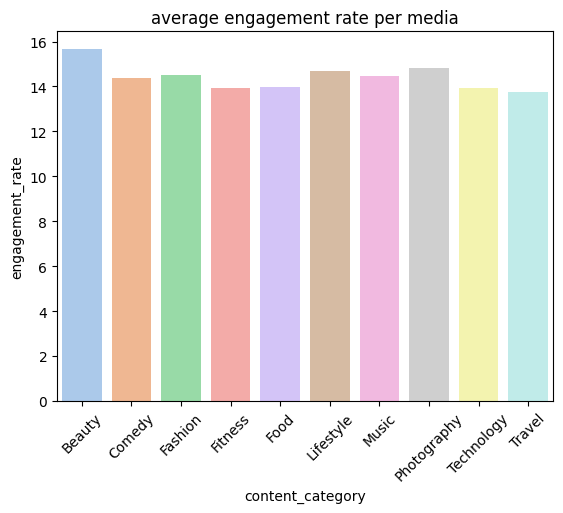

In [9]:
agg = df.groupby('content_category')['engagement_rate'].mean().reset_index()
sns.barplot(x='content_category', y='engagement_rate',data=agg, palette='pastel' )
plt.title('average engagement rate per media')
plt.xlabel('content_category')
plt.xticks(rotation=45) 
plt.ylabel('engagement_rate')
plt.show()

In [10]:
avg_shares = df.groupby('content_category')['likes'].mean().sort_values(ascending=False)
print(avg_shares)

content_category
Beauty         101651.713512
Technology     101451.743140
Food           101236.880399
Photography    100587.300494
Lifestyle       99503.017567
Fashion         99344.997693
Travel          99100.074798
Comedy          99043.153220
Fitness         98857.232024
Music           98341.213786
Name: likes, dtype: float64


**How reach and impressions relate to engagement**

In [11]:
df[["reach", "impressions", "engagement_rate"]].corr()


,reach,impressions,engagement_rate
reach,1.000000,0.970222,-0.338687
impressions,0.970222,1.000000,-0.366118
engagement_rate,-0.338687,-0.366118,1.000000


In [12]:
avg_traffic = df.groupby('traffic_source')['reach'].mean().sort_values(ascending=False)
print(avg_traffic)

traffic_source
Profile       1.012731e+06
External      9.998170e+05
Hashtags      9.973863e+05
Home Feed     9.951300e+05
Reels Feed    9.944801e+05
Explore       9.795356e+05
Name: reach, dtype: float64


In [13]:
df[["caption_length", "impressions", "hashtags_count"]].corr()


,caption_length,impressions,hashtags_count
caption_length,1.000000,-0.007318,0.004147
impressions,-0.007318,1.000000,-0.003734
hashtags_count,0.004147,-0.003734,1.000000


# Model Training

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)



In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['media_type', 'traffic_source', 'content_category']
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    le_dict[col] = le

In [16]:
# Target variable
target_cols = ["engagement_rate", "impressions"]

# Feature selection
X_train = train_df.drop(columns=target_cols + ['post_id', 'upload_date'])
X_test  = test_df.drop(columns=target_cols + ['post_id', 'upload_date'])

y = train_df[target_cols]
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y)



RandomForestRegressor(max_depth=5, random_state=1)

In [17]:
X_train.dtypes


media_type          int64
likes               int64
comments            int64
shares              int64
saves               int64
reach               int64
caption_length      int64
hashtags_count      int64
followers_gained    int64
traffic_source      int64
content_category    int64
dtype: object

# Predictions


In [18]:
predictions = model.predict(X_test)

In [19]:
# predictions has shape (n_samples, 2) where:
# predictions[:, 0] = engagement_rate predictions
# predictions[:, 1] = impressions predictions

output = pd.DataFrame({
    'index': test_df.index,
    'predicted_engagement_rate': predictions[:, 0],  # First column
    'predicted_impressions': predictions[:, 1]        # Second column
})

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [20]:
print(output.head())

   index  predicted_engagement_rate  predicted_impressions
0   2308                   9.093911           1.280220e+06
1  22404                  34.330896           3.983740e+05
2  23397                  16.674017           7.207447e+05
3  25058                  13.371694           8.740530e+05
4   2664                  33.751880           4.028388e+05
